In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/houkong-moai/customer_churn.csv
/kaggle/input/mytest1logistic/customer_churn.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, fbeta_score)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
# 区域2：路径配置=====================================================
TRAIN_PATH = "/kaggle/input/mytest1logistic/customer_churn.csv"  # 训练集
OUTPUT_PATH = "/kaggle/working/predictions.csv"  # 结果文件路径

In [4]:
# 区域3：数据加载与预处理=============================================
# 加载训练集
train_data = pd.read_csv(TRAIN_PATH)
X = train_data.drop(['customer_id', train_data.columns[-1]],axis=1) 
y = train_data.iloc[:, -1]

In [5]:
# 定义特征类型（根据实际数据修改）
numeric_features = X.select_dtypes(include=['number']).columns  # 数值型特征示例
categorical_features = X.select_dtypes(include=['object']).columns       # 类别型特征示例

# 构建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),      # 标准化数值特征
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features)  # 独热编码
    ])

In [6]:
# 构建完整管道
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# 划分验证集（网页[5]数据分割方法）
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'subscription_length', 'monthly_bill', 'total_usage',
       'service_complaints'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=500))])

In [7]:
def generate_metrics(y_true, y_pred, prefix=""):
    """生成完整评估报告"""
    return {
        f"{prefix}Accuracy": accuracy_score(y_true, y_pred),
        f"{prefix}Precision": precision_score(y_true, y_pred, average='weighted'),
        f"{prefix}Recall": recall_score(y_true, y_pred, average='weighted'),
        f"{prefix}F1": f1_score(y_true, y_pred, average='weighted'),
        f"{prefix}F2": fbeta_score(y_true, y_pred, beta=2, average='weighted')
    }

# 生成多维度评估报告
val_pred = pipeline.predict(X_val)
metrics_report = generate_metrics(y_val, val_pred, "VAL_")
print(metrics_report)

{'VAL_Accuracy': 0.885, 'VAL_Precision': 0.8767390194075588, 'VAL_Recall': 0.885, 'VAL_F1': 0.8799517413803128, 'VAL_F2': 0.8827873563218391}


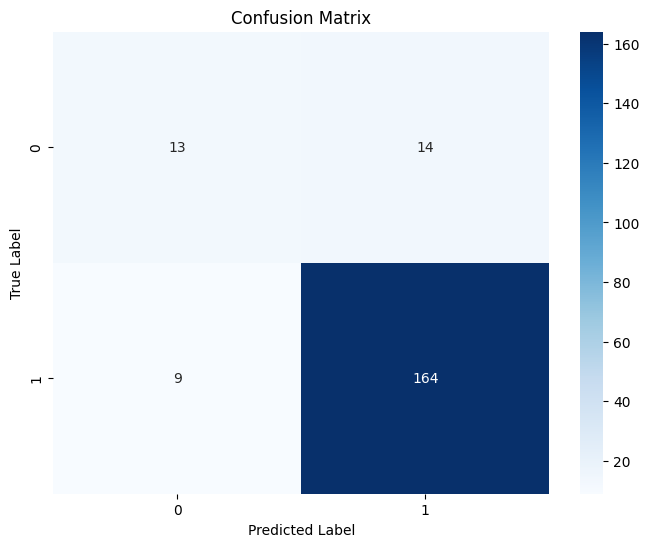

In [8]:
# 绘制混淆矩阵
cm = confusion_matrix(y_val, val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
predictions = pipeline.predict(train_data)

output_df = pd.DataFrame({
    'ID': train_data['customer_id'],
    'Churn': predictions
})

output_df.to_csv(OUTPUT_PATH, index=False, header=True)

# 保存完整管道
joblib.dump(pipeline, '/kaggle/working/model.pkl')

print(f"预测结果已保存至：{OUTPUT_PATH}")

预测结果已保存至：/kaggle/working/predictions.csv
